# stock market prediction using LSTM(Long Short Term Memory)

importing required libraries

In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

creating dataframe

In [49]:
dataset =  pd.read_csv('prices.csv', header=0)
dataset.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [50]:
df =dataset[dataset['symbol']=='YHOO'] #returns the column values associated with symbol Yhoo
#print(df)
df_stock_prices = df.close.values.astype('float32')
#print(df_stock_prices)
df_stock_prices = df_stock_prices.reshape(1762, 1)
#print(df_stock_prices)
df_stock_prices.shape

(1762, 1)

plotting

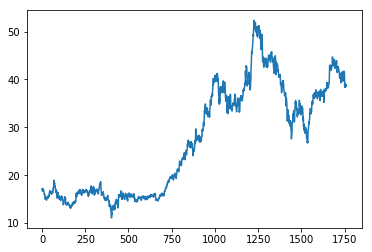

In [51]:
plt.plot(df_stock_prices)
plt.show()

#scaler = MinMaxScaler(feature_range=(0, 1))#Transforms features by scaling each feature to a given range.
#df_stock_prices = scaler.fit_transform(df_stock_prices)


next splitting the data into train test where train:test is 80:20 ratio.
we build the model on train data and test its performance on test data

In [52]:
train_size = int(len(df_stock_prices) * 0.80) #80%
test_size = len(df_stock_prices) - train_size #20%
train, test = df_stock_prices[0:train_size,:], df_stock_prices[train_size:len(df_stock_prices),:]
#print(test)
print(len(train), len(test))

1409 353


In [53]:
# convert an array of values into a dataset matrix
def create_dataset(datasett, look_back=1): #define a function
	dataX, dataY = [], []
	for i in range(len(datasett)-look_back-1):
		a = datasett[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(datasett[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [54]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back) #calling the function here
testX, testY = create_dataset(test, look_back)


In [55]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

building the model

In [56]:
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  from ipykernel import kernelapp as app


compilation time :  0.13176918029785156


In [57]:
#using the converted array into dataset matrix to fit the model(train data)
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=10,
    validation_split=0.05)

C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 1336 samples, validate on 71 samples
Epoch 1/10
1336/1336 [==============================] - 30s 22ms/step - loss: 684.5534 - val_loss: 1560.0892
Epoch 2/10
1336/1336 [==============================] - 0s 117us/step - loss: 615.4768 - val_loss: 1409.4395
Epoch 3/10
1336/1336 [==============================] - 0s 90us/step - loss: 524.2239 - val_loss: 1229.2408
Epoch 4/10
1336/1336 [==============================] - 0s 78us/step - loss: 427.4526 - val_loss: 1044.2008
Epoch 5/10
1336/1336 [==============================] - 0s 71us/step - loss: 336.9216 - val_loss: 858.0136
Epoch 6/10
1336/1336 [==============================] - 0s 75us/step - loss: 260.6205 - val_loss: 697.4422
Epoch 7/10
1336/1336 [==============================] - 0s 66us/step - loss: 205.2671 - val_loss: 588.5042
Epoch 8/10
1336/1336 [==============================] - 0s 84us/step - loss: 177.2977 - val_loss: 532.8669
Epoch 9/10
1336/1336 [==============================] - 0s 57us/step - loss: 161.4102 - val_

[[19.554926]]
[[24.035877]]
[[25.050785]]
[[25.346354]]
[[25.455912]]
[[ 818.3174]
 [1003.291 ]
 [1045.1864]
 [1057.3875]
 [1061.91  ]]


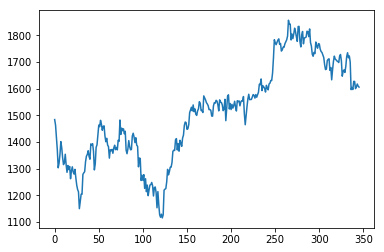

In [58]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()
    
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)#testing on test data
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)#calling the function here